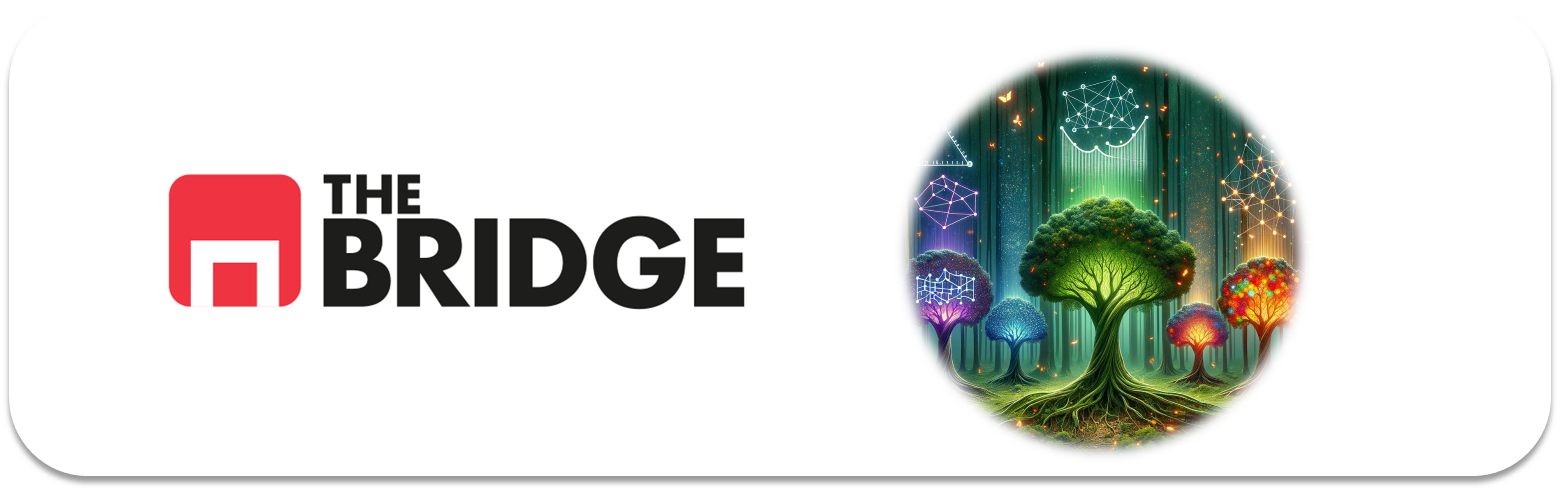

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [139]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [140]:
df_bank= pd.read_csv("./data/bank-full.csv", sep=";")
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [141]:
df_bank["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [142]:
print(df_bank["contact"].value_counts())
print(df_bank["poutcome"].value_counts())
print(df_bank["job"].value_counts())
print(df_bank["education"].value_counts())

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [143]:
#contact y poutcome tienen demasiados valores unknown lo mejor será borrarlas
df_bank= df_bank.drop(columns=["contact","poutcome"])
print(df_bank.columns.to_list())
df_bank.head()

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y']


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


In [144]:
df_bank["pdays"].value_counts() #Dada la distribución la convierto en categorica

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [145]:
df_bank['pdays_category'] = pd.cut(df_bank['pdays'], bins=[df_bank['pdays'].min()-1, 0, 30, 90, 180, 365, df_bank['pdays'].max()+1 ], 
                              labels=['never_contacted', 'last_month', '1-3_months', '3-6_months', '6-12_months', '12+_months'])
df_bank=df_bank.drop(columns=['pdays'])
df_bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,pdays_category
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,0,no,never_contacted
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,0,no,never_contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,0,no,never_contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,0,no,never_contacted
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,0,no,never_contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,0,yes,never_contacted
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,0,yes,never_contacted
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,3,yes,6-12_months
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,0,no,never_contacted


In [146]:
df_bank["pdays_category"].value_counts()

pdays_category
never_contacted    36954
6-12_months         4416
3-6_months          2480
12+_months           643
1-3_months           530
last_month           188
Name: count, dtype: int64

In [147]:
print(df_bank.columns.to_list())
df_bank.head()

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous', 'y', 'pdays_category']


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,pdays_category
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,0,no,never_contacted
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,0,no,never_contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,0,no,never_contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,0,no,never_contacted
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,0,no,never_contacted


In [148]:
features_num= ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
numericas_contarget=['age', 'balance', 'day', 'duration', 'campaign', 'previous',"y"]
features_cat= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'pdays_category']
numerizar_binarias= ['default', 'housing', 'loan',"y"]
one_hot= ['job', 'marital', 'education', 'month', 'pdays_category']
target="y"

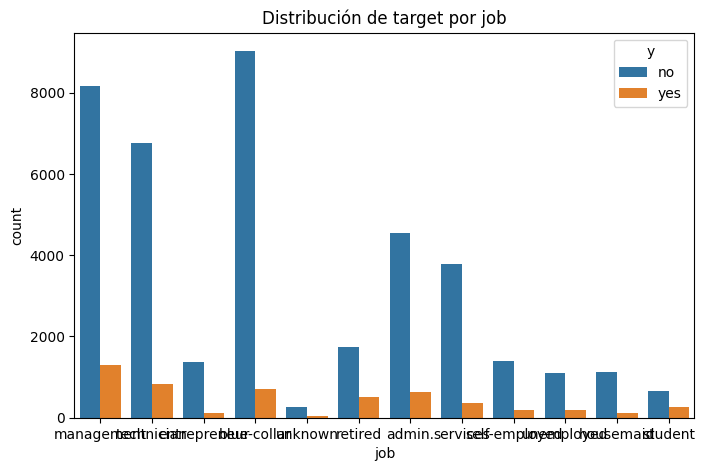

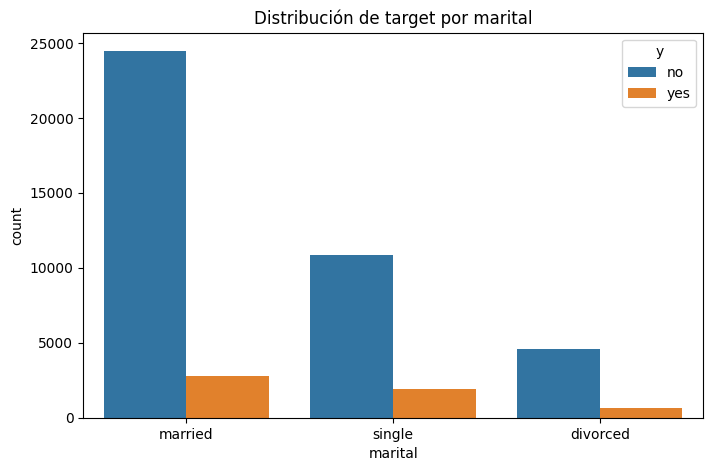

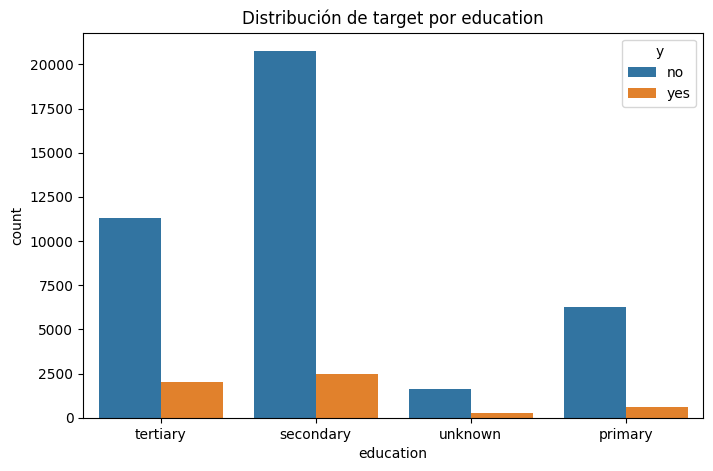

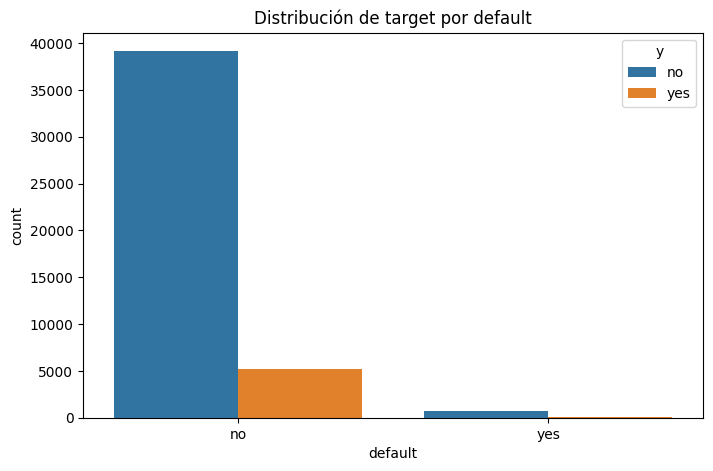

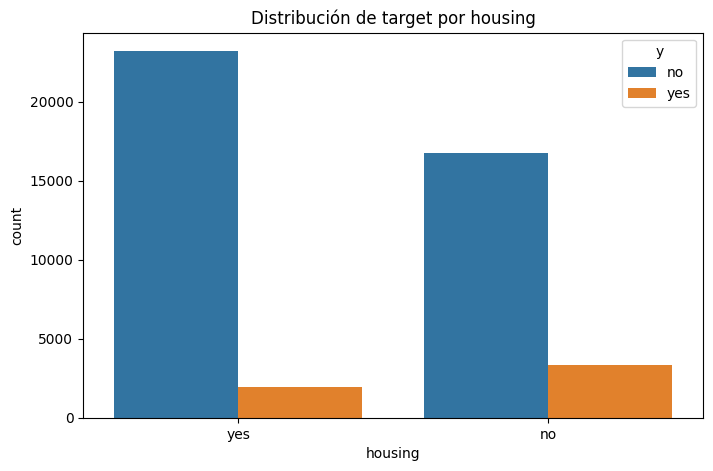

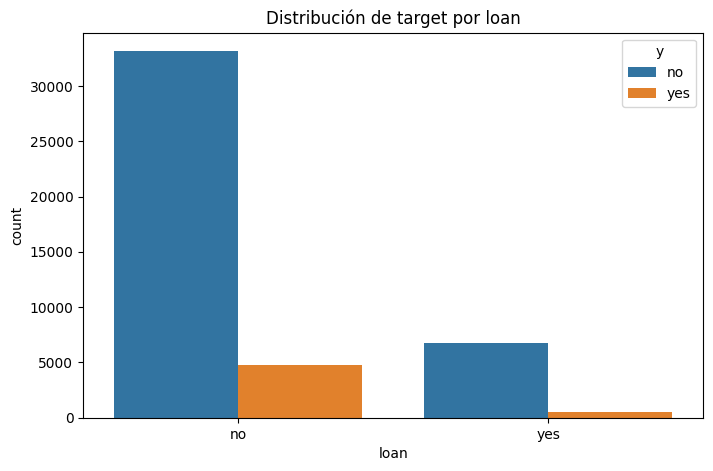

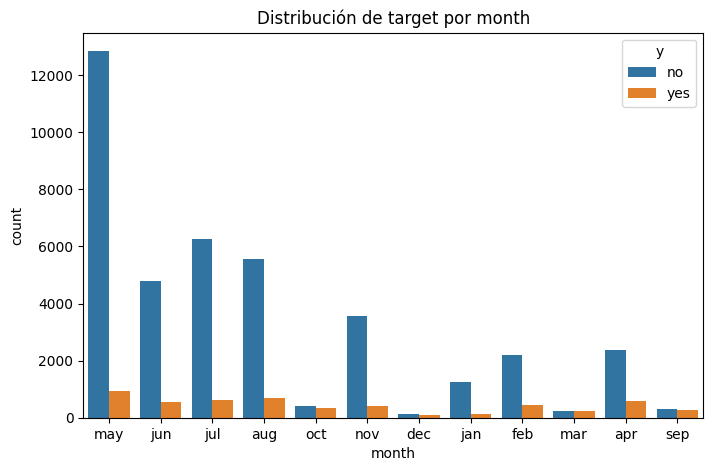

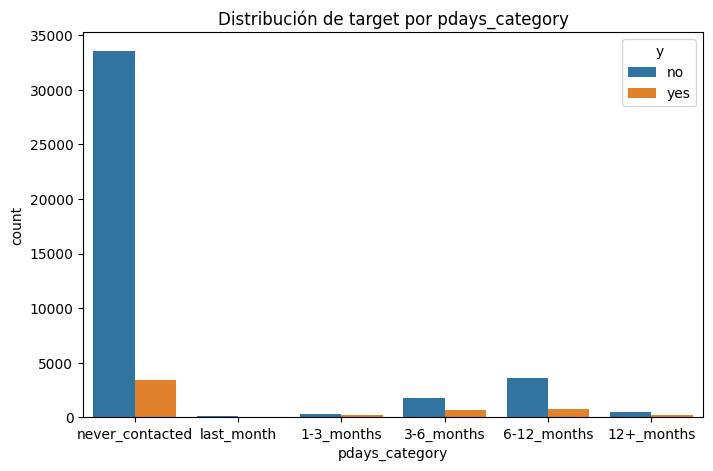

In [149]:
for col in features_cat:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_bank, x=col, hue=target)
    plt.title(f'Distribución de target por {col}')
    plt.show()

In [150]:
#Me quedo con todas mis categoricas en principio, voy a hacerles los cambios pertinentes

In [151]:
df_bank[numerizar_binarias] = df_bank[numerizar_binarias].replace({'yes': 1, 'no': 0})
df_bank.head()

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_14572\1440114919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank[numerizar_binarias] = df_bank[numerizar_binarias].replace({'yes': 1, 'no': 0})


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,pdays_category
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,0,0,never_contacted
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,0,0,never_contacted
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,0,0,never_contacted
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,0,0,never_contacted
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,0,0,never_contacted


In [152]:
df_bank[numerizar_binarias].value_counts()

default  housing  loan  y
0        1        0     0    18813
         0        0     0    13872
         1        1     0     3976
         0        0     1     3120
                  1     0     2498
         1        0     1     1648
1        1        0     0      280
0        1        1     1      258
         0        1     1      211
1        0        0     0      197
                  1     0      160
         1        1     0      126
                  0     1       22
         0        0     1       15
                  1     1        8
         1        1     1        7
Name: count, dtype: int64

In [153]:
#Las categoricas que quedan les hago un one_hot 
df_bank= pd.get_dummies(df_bank,columns=one_hot,dtype=int)
df_bank

,age,default,balance,housing,loan,day,duration,campaign,previous,y,...,month_may,month_nov,month_oct,month_sep,pdays_category_never_contacted,pdays_category_last_month,pdays_category_1-3_months,pdays_category_3-6_months,pdays_category_6-12_months,pdays_category_12+_months
0,58,0,2143,1,0,5,261,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,44,0,29,1,0,5,151,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,33,0,2,1,1,5,76,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,47,0,1506,1,0,5,92,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,33,0,1,0,0,5,198,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,0,1,...,0,1,0,0,1,0,0,0,0,0
45207,71,0,1729,0,0,17,456,2,0,1,...,0,1,0,0,1,0,0,0,0,0
45208,72,0,5715,0,0,17,1127,5,3,1,...,0,1,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,0,0,...,0,1,0,0,1,0,0,0,0,0


In [154]:
df_bank[numericas_contarget].corr() 
#Con respecto a la correlacion me las quedo todas, no son demasiadas y tienen correlaciones similares, me parece injusto quitar alguna pero debo resaltar la importancia de duration
#Con respecto a la colinealidad no destaca ninguna relacion como demasiado alineada, por lo que tampoco eliminamos ninguna columna

,age,balance,day,duration,campaign,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.032855,-0.073172
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.093236,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

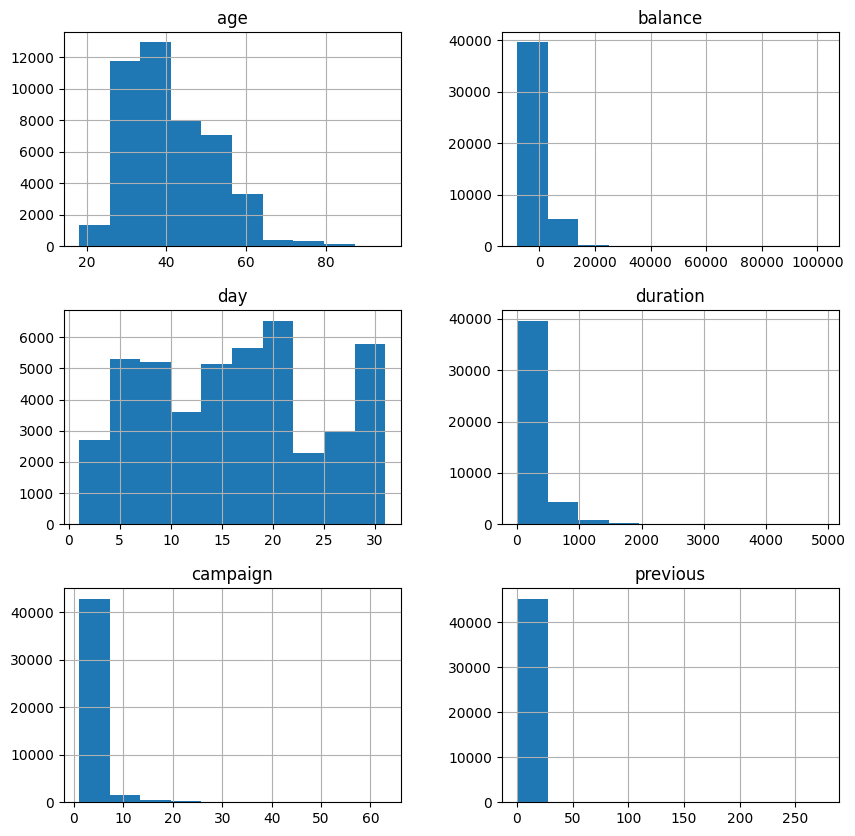

In [155]:
df_bank[features_num].hist(figsize=(10,10))

In [156]:
#Viendo los histogramas procedo a logaritmizar campaign, duration y previous, en balance NO puedo hacerlo porque tiene valores negativos 
df_bank['duration'] = np.log1p(df_bank['duration'])
df_bank['campaign'] = np.log1p(df_bank['campaign'])
df_bank['previous'] = np.log1p(df_bank['previous'])

In [159]:
df_bank

,age,default,balance,housing,loan,day,duration,campaign,previous,y,...,month_may,month_nov,month_oct,month_sep,pdays_category_never_contacted,pdays_category_last_month,pdays_category_1-3_months,pdays_category_3-6_months,pdays_category_6-12_months,pdays_category_12+_months
0,58,0,2143,1,0,5,5.568345,0.693147,0.000000,0,...,1,0,0,0,1,0,0,0,0,0
1,44,0,29,1,0,5,5.023881,0.693147,0.000000,0,...,1,0,0,0,1,0,0,0,0,0
2,33,0,2,1,1,5,4.343805,0.693147,0.000000,0,...,1,0,0,0,1,0,0,0,0,0
3,47,0,1506,1,0,5,4.532599,0.693147,0.000000,0,...,1,0,0,0,1,0,0,0,0,0
4,33,0,1,0,0,5,5.293305,0.693147,0.000000,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,6.885510,1.386294,0.000000,1,...,0,1,0,0,1,0,0,0,0,0
45207,71,0,1729,0,0,17,6.124683,1.098612,0.000000,1,...,0,1,0,0,1,0,0,0,0,0
45208,72,0,5715,0,0,17,7.028201,1.791759,1.386294,1,...,0,1,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,6.232448,1.609438,0.000000,0,...,0,1,0,0,1,0,0,0,0,0


In [161]:
#Y ahora aplico el standard scaler a todas las numericas pero como tengo que entrenar el scaler solo con X_train hago antes el train_test_split
from sklearn.model_selection import train_test_split
X= df_bank.drop(columns=target)
y= df_bank[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train[features_num])
X_train[features_num]=scaler.transform(X_train[features_num])

In [163]:
X_test[features_num]=scaler.transform(X_test[features_num])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

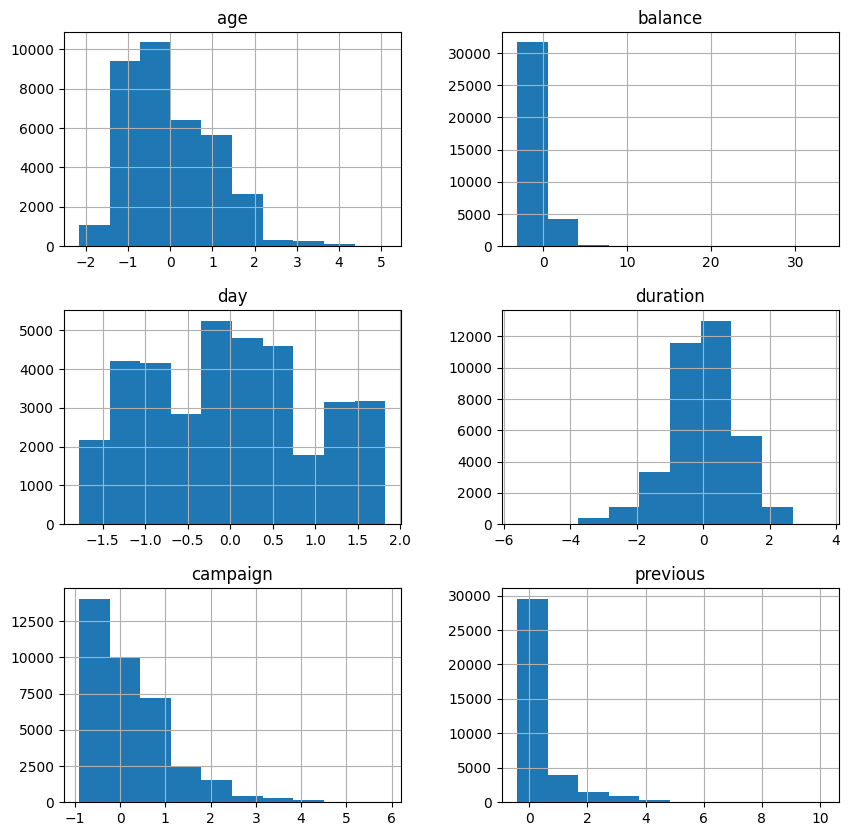

In [ ]:
X_train[features_num].hist(figsize=(10,10))
#Han mejorado en sus distribuciones

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

In [167]:
#Ya tengo todo preparado para entrenar y probar modelos

#Instancia de Modelos basicos de arbol de decisión y regresión logistica
log_reg= LogisticRegression()
tree= DecisionTreeClassifier()
#Entrenamiento de Modelos basicos
log_reg.fit(X_train,y_train)
tree.fit(X_train,y_train)
#Predicciones de Modelos Basicos
log_reg_predict=log_reg.predict(X_test)
tree_predict=tree.predict(X_test)

In [168]:
from sklearn.model_selection import GridSearchCV

#Busqueda de Parametros para el Modelo Optimizado de Arbol de decision
params_tree= {
    "max_depth":[5, 10, 20, 30, None],
    "min_samples_split":[2, 5, 10, 50, 100],
    "min_samples_leaf":[1, 5, 10, 20, 50]
}

hiper_tree= DecisionTreeClassifier()
grid_search_tree = GridSearchCV(hiper_tree,
                           params_tree,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1
                          )

grid_search_tree.fit(X_train, y_train)
grid_search_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [169]:
# Creación Entrenamiento y Predicción del Modelo Optimizado de Arbol de decision
best_tree= DecisionTreeClassifier(max_depth=5,min_samples_leaf=20,min_samples_split=2)
best_tree.fit(X_train,y_train)
best_tree_predict= best_tree.predict(X_test)

In [170]:
from sklearn.metrics import classification_report

print("Primera Prueba Regresión Logistica:")
print(classification_report(y_test,log_reg_predict))
print("-----------------------------------")
print("Primera Prueba Arbol de decision:")
print(classification_report(y_test,tree_predict))
print("---------------------------------")
print("Modelo Optimizado de Arbol de Decisión")
print(classification_report(y_test,best_tree_predict))

Primera Prueba Regresión Logistica:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.63      0.31      0.42      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.64      0.68      9043
weighted avg       0.88      0.89      0.88      9043

-----------------------------------
Primera Prueba Arbol de decision:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.45      0.46      0.46      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

---------------------------------
Modelo Optimizado de Arbol de Decisión
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.57      0.38      0.45      1091

   